## Imports

In [44]:
!pip install seaborn==0.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 520.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data

In [46]:
titanic_df = pd.read_csv(
    "data/titanic.csv", #dataset path
    index_col="PassengerId"
    )

display(titanic_df.head())
display(titanic_df.shape)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 11)

[Data Dictionary](https://www.kaggle.com/competitions/titanic/data)

### Turning object values into numeric

In [47]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [48]:
embarked = {'S': 1,
            'C': 2,
            'Q': 3}

titanic_df["Embarked"] = titanic_df.Embarked.map(embarked)

In [49]:
sex = {"male": 0, "female":1}

titanic_df["Sex"] = titanic_df.Sex.map(sex)

### Correlation

In [50]:
numeric_columns = titanic_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

correlation_matrix


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


### Missing values

In [51]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Droppig missing values

In [52]:
titanic_df.drop(["Cabin", "Ticket", "Embarked", "SibSp", "Parch", "Name"], axis=1, inplace=True)
titanic_df.dropna(inplace=True)

display(titanic_df.head())
display(titanic_df.shape)

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,0,22.0,7.2500
2,1,1,1,38.0,71.2833
3,1,3,1,26.0,7.9250
4,1,1,1,35.0,53.1000
5,0,3,0,35.0,8.0500


(714, 5)

### Reordering remaning columns

In [53]:
order = ["Pclass", "Sex", "Age", "Fare", "Survived"]
titanic_df = titanic_df[order]
titanic_df.head(1)

,Pclass,Sex,Age,Fare,Survived
PassengerId,,,,,
1,3,0,22.0,7.25,0


### Some statistics

In [54]:
titanic_df.Fare.describe().round(3)

count    714.000
mean      34.695
std       52.919
min        0.000
25%        8.050
50%       15.742
75%       33.375
max      512.329
Name: Fare, dtype: float64

### Exploring Sex column

In [55]:
# How it is encoded
sex

{'male': 0, 'female': 1}


#### Interesting question:

- How much women and man were in the Titanic? ✔
- How much of women and of man died or survived in the event? ✔
- Is it true that sex is related, in some level, to survive or not? ✔
- What were their average age in those events? ✔
- What were the most frequent Pclass they would belong?
- How much was their fare? Is it related to survive or not?


### - How much women and man were in the Titanic?

In [56]:
values = dict(titanic_df.Sex.value_counts())

In [57]:
sum(values.values())

714

In [58]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values.values())
        val = int(round(pct*total/100.0))
        return f'{pct:.2f}%  ({val:d})'
    return my_autopct

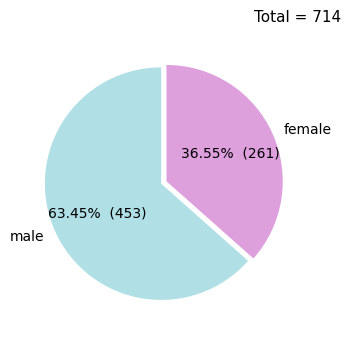

In [59]:
plt.pie(
    x=titanic_df.Sex.value_counts(),
    labels=list(sex),
    autopct=make_autopct(values),
    explode=(0, 0.05),
    startangle=90,
    colors=['powderblue', 'plum']
);

text = {'fontsize': 11,
        'verticalalignment': 'top',
        'horizontalalignment': 'left'}

plt.text(
    x=0.8,
    y=1.5,
    s=f"Total = {sum(values.values())}",
    fontdict=text
);

### - How much of women and of man died/survived in the event?

In [60]:
sex

{'male': 0, 'female': 1}

In [61]:
titanic_df[["Sex", "Survived"]].value_counts()

Sex  Survived
0    0           360
1    1           197
0    1            93
1    0            64
Name: count, dtype: int64

In [62]:
gender_survivals = dict(titanic_df[["Sex", "Survived"]].value_counts())
gender_survivals

{(0, 0): 360, (1, 1): 197, (0, 1): 93, (1, 0): 64}

In [63]:
genres = ['Male', 'Female']
survivals = [gender_survivals.get((0,1)), gender_survivals.get((1,1))]
not_survivals = [gender_survivals.get((0,0)), gender_survivals.get((1,0))]

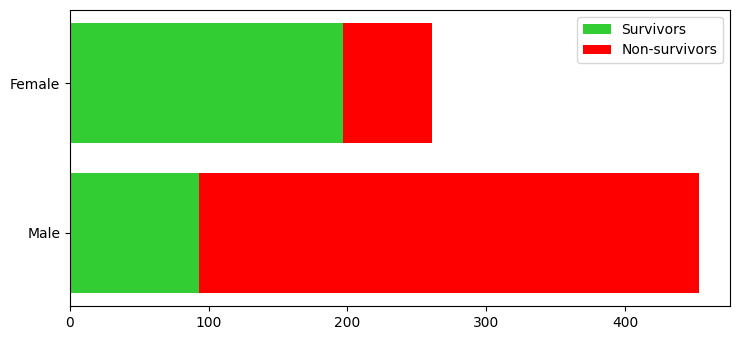

In [64]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plot1 = plt.barh(genres, survivals, color='limegreen')
plot2 = plt.barh(genres, not_survivals,  left=survivals, color='red')
plt.legend([plot1, plot2], ['Survivors', 'Non-survivors']);

### Is it true that sex is related, in some level, to survive or not?

In [65]:
titanic_df[['Sex', 'Survived']].corr()

,Sex,Survived
Sex,1.000000,0.538826
Survived,0.538826,1.000000


If we analyze the previous chart and the correlation matrix, we can say that they can be related but not so strongly.

TO-DO: p-value test

### What were their average age in those events?

###### Note: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

In [66]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Creating age groups

In [67]:
def classify_group_age(age):
    if (age <= 1):
        return 1
    elif (age > 1) & (age <= 11):
        return 2
    elif (age > 11) & (age <= 15):
        return 3
    elif (age > 15) & (age <= 19):
        return 4
    elif (age > 19) & (age <= 30):
        return 5
    elif (age > 30) & (age <= 50):
        return 6
    else:
        return 7


In [68]:
titanic_df['Age Group'] = [classify_group_age(age) for age in titanic_df['Age']]

In [69]:
age_survivals = dict(titanic_df[['Age Group', 'Survived']].groupby('Survived').value_counts())
age_survivals

{(0, 5): 158,
 (0, 6): 139,
 (0, 4): 51,
 (0, 7): 42,
 (0, 2): 27,
 (0, 3): 5,
 (0, 1): 2,
 (1, 6): 102,
 (1, 5): 87,
 (1, 4): 30,
 (1, 2): 27,
 (1, 7): 22,
 (1, 1): 12,
 (1, 3): 10}

In [70]:
age_group = titanic_df['Age Group'].unique().tolist()
age_group.sort()
age_group

[1, 2, 3, 4, 5, 6, 7]

In [71]:
titanic_df.head()

,Pclass,Sex,Age,Fare,Survived,Age Group
PassengerId,,,,,,
1,3,0,22.0,7.2500,0,5
2,1,1,38.0,71.2833,1,6
3,3,1,26.0,7.9250,1,5
4,1,1,35.0,53.1000,1,6
5,3,0,35.0,8.0500,0,6


In [72]:
c = list(titanic_df[['Age Group', 'Survived']].query("Survived == 0").groupby('Age Group').value_counts())
c

[2, 27, 5, 51, 158, 139, 42]

In [73]:
d = list(titanic_df[['Age Group', 'Survived']].query("Survived == 1").groupby('Age Group').value_counts())
d

[12, 27, 10, 30, 87, 102, 22]

In [74]:
survivals_group_dict = {'Age Group': age_group, 'Total Survivals': d, 'Total Death': c}

In [75]:
survivals_group_dict

{'Age Group': [1, 2, 3, 4, 5, 6, 7],
 'Total Survivals': [12, 27, 10, 30, 87, 102, 22],
 'Total Death': [2, 27, 5, 51, 158, 139, 42]}

In [76]:
survivals_group_dict = pd.DataFrame(survivals_group_dict)

In [77]:
survivals_group_dict

,Age Group,Total Survivals,Total Death
0,1,12,2
1,2,27,27
2,3,10,5
3,4,30,51
4,5,87,158
5,6,102,139
6,7,22,42


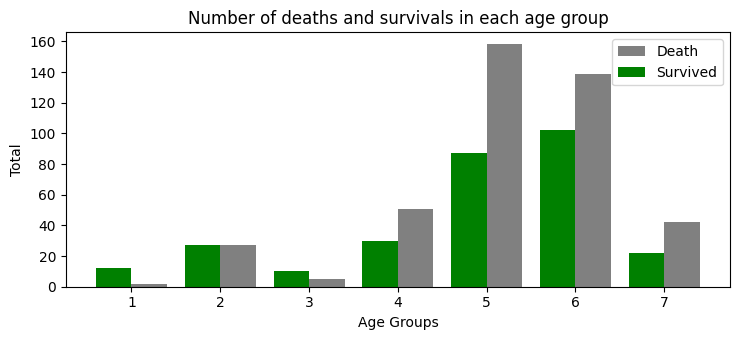

In [78]:
plt.bar(np.array(age_group) + 0.2, survivals_group_dict['Total Death'], 0.4, label='Death', color='grey');
plt.bar(np.array(age_group) - 0.2, survivals_group_dict['Total Survivals'], 0.4, label='Survived', color='green');
plt.xticks(survivals_group_dict['Age Group'], age_group)
plt.xlabel("Age Groups")
plt.ylabel("Total")
plt.title("Number of deaths and survivals in each age group")
plt.legend();

In [79]:
titanic_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
886    29.1250
887    13.0000
888    30.0000
890    30.0000
891     7.7500
Name: Fare, Length: 714, dtype: float64

In [80]:
titanic_df

,Pclass,Sex,Age,Fare,Survived,Age Group
PassengerId,,,,,,
1,3,0,22.0,7.2500,0,5
2,1,1,38.0,71.2833,1,6
3,3,1,26.0,7.9250,1,5
4,1,1,35.0,53.1000,1,6
5,3,0,35.0,8.0500,0,6
...,...,...,...,...,...,...
886,3,1,39.0,29.1250,0,6
887,2,0,27.0,13.0000,0,5
888,1,1,19.0,30.0000,1,4


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


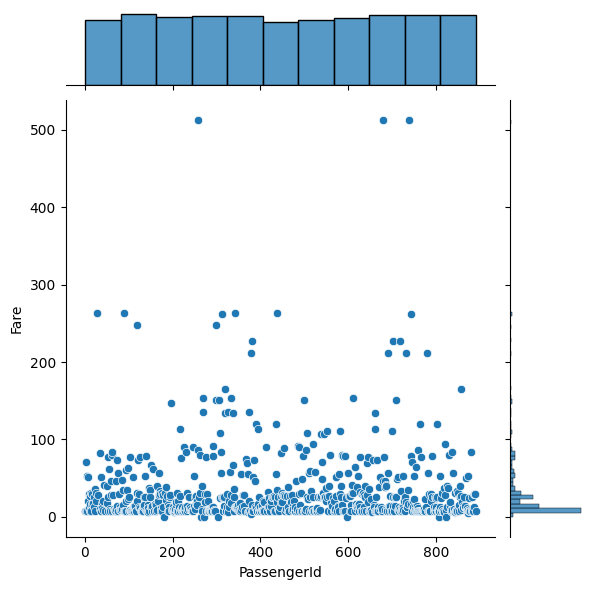

In [81]:
sns.jointplot(titanic_df.Fare);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


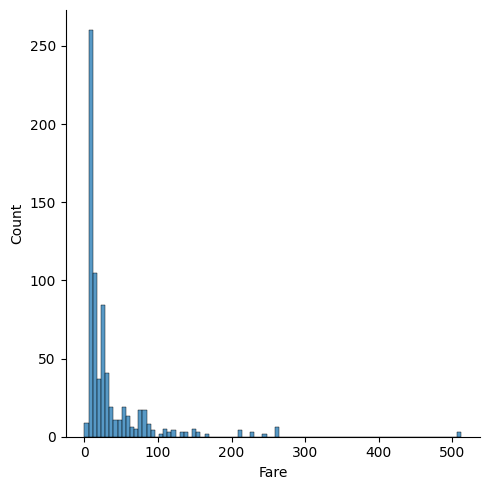

In [82]:
sns.displot(titanic_df.Fare);

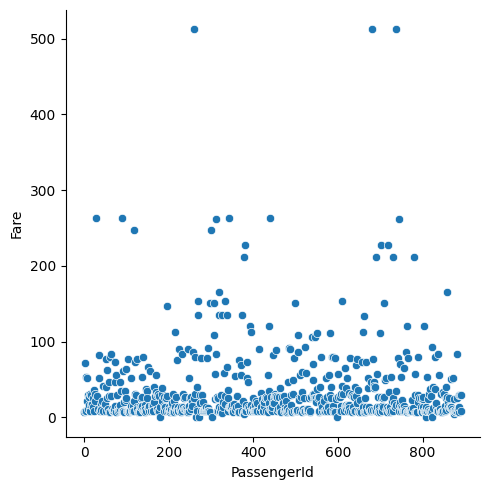

In [93]:
sns.relplot(titanic_df.Fare)